# Figure 3C

In [1]:
# required libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('Predicted normalized trajectories: Scaling', y=1.05, size=65)    
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized position')
    plt.xlim(tau/24,8)
    plt.ylim(-0.2,1.2)    
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 42})
    filename = "./" + "Fig_3C.png"    
    fig.savefig(filename, dpi=300, bbox_inches='tight')    

In [3]:
n0 = 200  # Number of cells after amputation
l = -1050  # Recruitment limit
tau = 24 # Delay
cell_diameter = 13.2

root = '../main/simulations/switchpoint/'
parameters_set = "n0="+str(n0)+"_l="+str(l)+"_tau="+str(tau)
folder = root+parameters_set

df_all = []
files = os.listdir(folder)
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(folder+"/"+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*cell_diameter
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean = np.asarray(df_all.mean(axis=1))
df_std = np.asarray(df_all.std(axis=1))
time = df0['time']/24
sp = df_mean

<ipython-input-5-ef358dd033a6>:28: RuntimeWarning: Mean of empty slice.
  clones_pos_t.append(positions.mean())    # Determines the clones mean


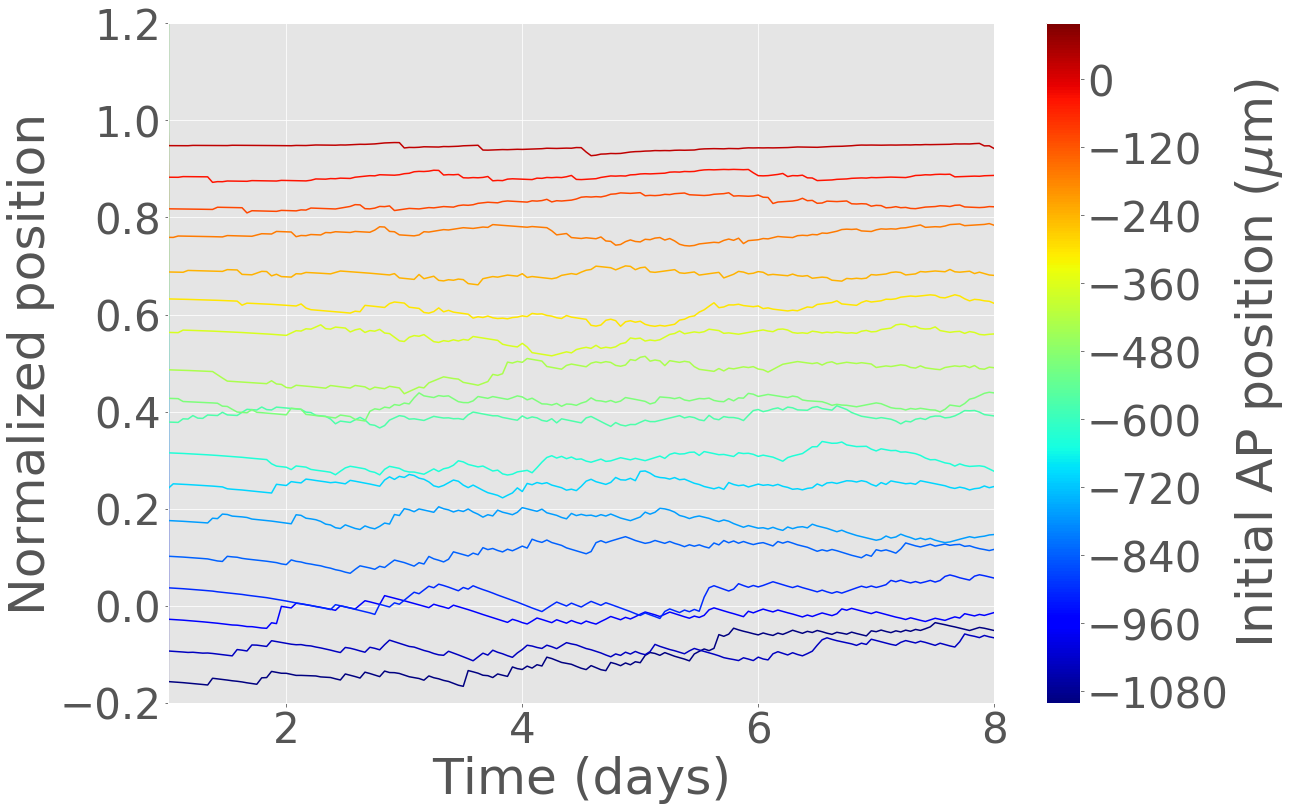

In [5]:
root = '../main/simulations/outgrowth/'
parameters_set = "n0="+str(n0)+"_l="+str(l)+"_tau="+str(tau)
folder = root+parameters_set+'/trajectories/'
times = np.arange(0,8*24+1)
clones_pos = np.arange(110,n0+5,5)    # From -1100 to 0um (50um by 50um). Similar to Rost et al.

fig = plt.figure()
ax1 = fig.add_subplot(111)

files = os.listdir(folder)
ordered_files = sorted(files)
random.seed(33)
random.shuffle(ordered_files)

outgrowths_all = []
tracks = []
i = 0
for clon in clones_pos:    # Iterates over clones in space
    opened_file = open(folder+ordered_files[i])    # Select the clone for a given seed
    df0 = pd.read_csv(opened_file, delimiter=',')    # Saves de data into a data frame
    cells = df0['positions']    # Keeps only the positions
    clones_pos_t = []
    outgrowth_t = []
    for t in times:    # Iterates over time
        cells_clean = np.asarray(cells[t].split("]")[0].split()[1:]).astype(np.float)    # Data type filter
        positions = np.argwhere(cells_clean==clon)   # Finds the clone positions for a time
        outgrowth = np.argwhere(cells_clean==n0-1)    # Outgrowth
        clones_pos_t.append(positions.mean())    # Determines the clones mean
        outgrowth_t.append(outgrowth.mean())
    tracks.append(clones_pos_t)    # Save the track for each clone
    outgrowths_all.append(outgrowth_t)
    i += 1

tracks = (((np.asarray(tracks)-n0)*cell_diameter))
outgrowths_all = (((np.asarray(outgrowths_all)-n0)*cell_diameter))

colors = cm.jet(np.linspace(0,1,len(clones_pos)))
for xt, lt,color in zip(tracks,outgrowths_all,colors):
    ax1.plot(np.asarray(times)/24, (xt-sp)/(lt-sp),color=color)
sm = cm.ScalarMappable(cmap='jet')
sm.set_array([])
plt.colorbar(sm, boundaries=np.arange(-1100,100),label='Initial AP position'+ ' (' + r'$\mu$'+'m)')
    
plot_create()